<a href="https://colab.research.google.com/github/mbalbi/ciencia_de_datos/blob/main/tps/1c2024/Practica_3_completa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clase 3: Procesamiento de datos

##EDA: Análisis exploratorio de datos

El análisis exploratorio de datos, EDA, es una etapa crítica en la ciencia de datos y es la base de cualquier uso posterior que se le dé a los mismos.

Permite:
- Comprender el problema y la calidad de la información
- Limpiar los datos
- Comprobar supuestos

### Carga de los datos: Dataset siniestros

Se desea tomar acciones para reducir los accidentes de tránsito con heridos graves y mortales que ocurren en la ciudad de Buenos Aires, por lo que se analizarán los registros entre los años 2015 y 2018.

In [ ]:
#Se importan las librerías:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving Victimas_siniestros_2015-2018.csv to Victimas_siniestros_2015-2018.csv


In [ ]:
import io

#Se crea un DataFrame
df_siniestros = pd.read_csv(io.BytesIO(uploaded['Victimas_siniestros_2015-2018.csv']))
df_siniestros.head()

<ipython-input-3-3d2e148543af>:4: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_siniestros = pd.read_csv(io.BytesIO(uploaded['Victimas_siniestros_2015-2018.csv']))


,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2/14/2015,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2/25/2015,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2/27/2015,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,03-02-15,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,04-09-15,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion


### Repaso

Utilizando lo aprendido en la clase anterior:

In [ ]:
# Veremos el tamaño de la data y el nombre de la columnas
print('Cantidad de Filas y columnas:', df_siniestros.shape)
print('Nombre columnas:', df_siniestros.columns)

Cantidad de Filas y columnas: (33234, 29)
Nombre columnas: Index(['causa', 'rol', 'tipo', 'sexo', 'edad', 'mes', 'periodo', 'fecha',
       'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
       'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2',
       'codigo_calle', 'codigo_cruce', 'geocodificacion', 'semestre', 'x', 'y',
       'geom', 'cantidad_victimas', 'comuna', 'geom_3857', 'tipo_colision1',
       'participantes_victimas', 'participantes_acusados'],
      dtype='object')


In [ ]:
# Podemos ver, por columna, cuantos valores no nulos hay y el tipo de dato que contiene
df_siniestros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33234 entries, 0 to 33233
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   causa                         33234 non-null  object 
 1   rol                           32899 non-null  object 
 2   tipo                          32134 non-null  object 
 3   sexo                          33037 non-null  object 
 4   edad                          32675 non-null  float64
 5   mes                           33197 non-null  float64
 6   periodo                       33234 non-null  int64  
 7   fecha                         33173 non-null  object 
 8   hora                          33217 non-null  object 
 9   lugar_hecho                   29518 non-null  object 
 10  direccion_normalizada         32469 non-null  object 
 11  tipo_calle                    33234 non-null  object 
 12  direccion_normalizada_arcgis  32462 non-null  object 
 13  c

Algunas modificaciones que podríamos realizar partiendo de `.info()` es **el tipo de dato** de algunas columnas, como por ejemplo "fecha". Para ello, se puede utilizar `to_datetime()` o el método `.astype()` que es más genérico, ya que sólo se debe indicar el tipo de dato que deseamos, como por ejemplo:
  1. `Object`: Valores alfanuméricos.

  2. `Int64`: Números enteros.

  3. `Float64`: Números decimales.

  4. `Bool`: True/False.

  5. `Datetime64`: Fecha y horario.

In [ ]:
# Modificar el tipo de dato:
df_siniestros['fecha'] = pd.to_datetime(df_siniestros['fecha']) # astype() es otra forma
df_siniestros.dtypes

causa                                   object
rol                                     object
tipo                                    object
sexo                                    object
edad                                   float64
mes                                    float64
periodo                                  int64
fecha                           datetime64[ns]
hora                                    object
lugar_hecho                             object
direccion_normalizada                   object
tipo_calle                              object
direccion_normalizada_arcgis            object
calle1                                  object
altura                                 float64
calle2                                  object
codigo_calle                           float64
codigo_cruce                           float64
geocodificacion                         object
semestre                                 int64
x                                      float64
y            

In [ ]:
# Otro ejemplo para modificar tipo de dato
df_siniestros['edad'] = df_siniestros['edad'].astype('int64')
df_siniestros.dtypes

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Otra modificación que podríamos realizar partiendo de `.info()` es analizar y tomar una decisión con respecto a los **valores nulos: NaN = 'Not a Number'**

In [ ]:
a = np.nan
print(a)

nan


Existen varios métodos útiles para detectar, eliminar y reemplazar valores nulos en las estructuras de datos de Pandas. Están:

- `isnull()`: genera un booleano (`True` - `False`) indicando los valores faltantes
- `notnull()`: lo opuesto a `isnull()`
- `dropna()`: descarta los valores faltantes.
- `fillna()`: devuelve una copia de los datos con los NaN reemplazados por un valor válido.

En una breve exploración, mostraremos estos métodos:

In [ ]:
data = pd.Series([15, np.nan, 'hello'])

data.isnull()

0    False
1     True
2    False
dtype: bool

In [ ]:
data.notnull()

0     True
1    False
2     True
dtype: bool

In [ ]:
data_without_NaN = data.dropna()
data_without_NaN

0       15
2    hello
dtype: object

In [ ]:
data_replace_NaN = data.fillna(0)
data_replace_NaN

0       15
1        0
2    hello
dtype: object

Utilizando `.describe()` obtenemos una descripción estadística de los datos numéricos: cantidad, media, desvío estándar, percentiles, valores máximo y mínimo.

**¿Qué significa count?**

In [ ]:
df_siniestros['cantidad_victimas'].describe()

count    33234.000000
mean         1.229494
std          0.778449
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         18.000000
Name: cantidad_victimas, dtype: float64

Algunos de esto valores pueden obtenerse utilizando ciertas funciones, como `.count()`, `.mean()`, `.std()`, `.max()` y `.min()`

### Limpieza y transformaciones

#### Análisis de duplicados

Para identificar filas duplicadas, se utiliza `.duplicated()` que devuelve un booleano, siendo `True` si se ha encontrado una fila igual a una anterior y `False` en caso contrario. Por otro lado, `.drop_duplicates()` elimina las filas repetidas.

In [ ]:
#Encontrar filas duplicadas
df_siniestros.duplicated()#.sum()

0        False
1        False
2        False
3        False
4        False
         ...  
33229    False
33230    False
33231    False
33232    False
33233    False
Length: 33234, dtype: bool

**¿Qué hacemos con los aparentes duplicados?**

In [ ]:
# Filtramos el DataFrame con .loc[]
df_siniestros.loc[df_siniestros.duplicated() == True]

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
3233,lesiones,conductor,automovil,masculino,29.0,4.0,2016,2016-04-17,7:45:00,avda la rabida & avda rosales,...,1,-58.369237,-34.606524,0101000020E61000002194D727432F4DC08EB32B93A24D...,4,1.0,0101000020110F0000392AE56E58C958C1E5F01986645C...,multiple,"automovil,automovil,NULL",automovil
3689,lesiones,peaton,peaton,femenino,30.0,6.0,2016,2016-06-16,18:30:00,dr juan f aranguren y argerich,...,1,-58.473748,-34.625605,0101000020E610000088C14DC7A33C4DC01A623CD71350...,2,7.0,0101000020110F0000E6B06BF7B4D458C11699E40D6F61...,peaton - vehiculo,"peaton,peaton",NaN
6076,lesiones,pasajero,automovil,femenino,52.0,6.0,2017,2017-06-25,19:15:00,hernndarias y tomas liberti,...,1,-58.369114,-34.631612,0101000020E6100000462D7F233F2F4DC070FD7AA8D850...,2,4.0,0101000020110F00008E6B850555C958C11D9F47570563...,multiple,"automovil,automovil","automovil,automovil"
6384,lesiones,conductor,moto,masculino,31.0,7.0,2017,2017-07-26,5:30:00,avda cordoba y maure,...,2,-58.449811,-34.582408,0101000020E610000035AEAB6B93394DC0FFD75F578C4A...,2,15.0,0101000020110F00006759A0CF1AD258C179F5D7ED0556...,multiple,"moto,moto",camioneta
7344,lesiones,conductor,automovil,masculino,NaN,2.0,2018,2018-02-28,6:00:00,NaN,...,1,-58.446250,-34.583986,0101000020E61000002281FDB61E394DC0F849260AC04A...,3,15.0,0101000020110F000069325AB1B7D158C11A2F39977056...,multiple,"automovil,automovil,automovil",automovil
7345,lesiones,conductor,automovil,masculino,NaN,2.0,2018,2018-02-28,6:00:00,NaN,...,1,-58.446250,-34.583986,0101000020E61000002281FDB61E394DC0F849260AC04A...,3,15.0,0101000020110F000069325AB1B7D158C11A2F39977056...,multiple,"automovil,automovil,automovil",automovil
7682,lesiones,conductor,moto,masculino,42.0,3.0,2018,2018-03-02,19:58:00,NaN,...,1,-58.427797,-34.622073,0101000020E6100000C66A270EC2364DC03B649E1AA04F...,2,6.0,0101000020110F0000E971BF27B6CF58C1465291278060...,multiple,"moto,moto",automovil
8129,lesiones,conductor,moto,masculino,35.0,5.0,2018,2018-05-19,8:15:00,NaN,...,1,-58.385029,-34.587035,0101000020E6100000A945D6A048314DC019C5F4F5234B...,2,2.0,0101000020110F0000145A40EC0FCB58C19111C6BF3E57...,multiple,"moto,moto","automovil,automovil"
10224,lesiones,conductor,taxi/remis,masculino,58.0,8.0,2015,2015-08-22,4:15:00,av. san juan y sanchez de loria,...,2,-58.412094,-34.624969,0101000020E6100000F12FDD7FBF344DC02A67F7FDFE4F...,3,5.0,0101000020110F0000B280912401CE58C15E81B3044461...,multiple,"taxi/remis,taxi/remis","taxi/remis,taxi/remis"
10870,lesiones,pasajero,moto,femenino,23.0,1.0,2016,2016-01-14,18:30:00,alberti y humberto primo,...,1,-58.400612,-34.622219,0101000020E6100000C105F83E47334DC05502E6DEA44F...,4,3.0,0101000020110F0000DFAA3397C1CC58C1E6B25FFE8960...,multiple,moto,"moto,moto"


Analicemos con mayor profundidad, qué ocurre en las filas:

- 11141, 11142, 11143 y 11144
- 33230 y 33231

In [ ]:
#pd.options.display.max_columns = 29 #para ver todas las columnas

x_0 = 11141
x_f = 11144 +1
df_siniestros.iloc[x_0 : x_f]

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
11141,lesiones,conductor,automovil,masculino,NaN,2.0,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11142,lesiones,conductor,automovil,masculino,NaN,2.0,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11143,lesiones,conductor,automovil,masculino,NaN,2.0,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN
11144,lesiones,conductor,automovil,masculino,NaN,2.0,2016,2016-02-28,19:00:00,general paz 11594,...,1,-58.528291,-34.651451,0101000020E6100000011F19089F434DC060D1DBC06253...,4,9.0,0101000020110F0000875E90E1A2DA58C11103C5874368...,multiple,"automovil,automovil,automovil,automovil",NaN


In [ ]:
# Elimino las filas duplicadas
df_siniestros.drop_duplicates()

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,2015-03-02,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018,2018-05-31,20:00:00,NaN,...,1,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico"""
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33231,lesiones,NaN,NaN,NaN,NaN,5.0,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018,2018-05-31,14:15:00,NaN,...,1,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil


In [ ]:
#Podemos especificar qué columnas no deben repetirse, antes de droppear
df_siniestros.drop_duplicates(
    subset=['causa', 'mes', 'periodo', 'fecha', 'hora', 'lugar_hecho', 'direccion_normalizada', 'tipo_calle',
            'direccion_normalizada_arcgis', 'calle1', 'altura', 'calle2', 'codigo_calle', 'codigo_cruce', 'geocodificacion',
            'semestre', 'x', 'y', 'geom', 'cantidad_victimas', 'comuna', 'geom_3857', 'tipo_colision1',
            'participantes_victimas', 'participantes_acusados'])

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,semestre,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,1,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,1,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,1,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico"""
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,2015-03-02,18:30:00,lavalle 1730,...,1,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,1,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33228,lesiones,conductor,moto,masculino,44.0,5.0,2018,2018-05-30,17:10:00,NaN,...,1,NaN,NaN,NaN,1,NaN,NaN,motovehiculo - vehiculo,moto,camioneta
33229,lesiones,conductor,transporte publico,masculino,26.0,5.0,2018,2018-05-31,20:00:00,NaN,...,1,-58.380960,-34.604036,0101000020E61000006AEE484BC3304DC010C5FD0A514D...,1,1.0,0101000020110F000004669DAE9ECA58C14EA52144BC5B...,vehiculo - vehiculo,"""transporte publico""","""transporte publico"""
33230,lesiones,pasajero,automovil,femenino,32.0,5.0,2018,2018-05-31,9:30:00,NaN,...,1,-58.453249,-34.602343,0101000020E6100000F4564213043A4DC02960C295194D...,2,15.0,0101000020110F00005413197D7AD258C1CD4801D2495B...,multiple,"NULL,automovil","automovil,automovil"
33232,lesiones,conductor,moto,masculino,34.0,5.0,2018,2018-05-31,14:15:00,NaN,...,1,-58.450768,-34.588691,0101000020E6100000399BE9C7B2394DC0B86DCB365A4B...,1,15.0,0101000020110F000069C5037235D258C1D72632B0AE57...,motovehiculo - vehiculo,moto,automovil


#### Modificar valores:

Teniendo en cuenta que los datos pueden ser de dos tipos:

- **Cuantitativos**: se representan por números discretos (cantidad de personas accidentadas) o continuos (coordenadas geográficas).

- **Categóricos**: datos cualitativos que pueden ser ordinales (bajo, medio, alto) o no ordinal (sexo)

Observemos la columna **tipo** de valores categóricos. **¿Es necesaria alguna corrección en los datos?**

In [ ]:
# Contabilizar la frecuenta por valor único
df_siniestros['tipo'].unique()

array(['moto', nan, 'peaton', 'camion', 'automovil', 'transporte publico',
       'auto pfa / movil / gendarmeria / metropolitana / moto movil',
       'utilitario', 'bicicleta', 'camioneta', 'taxi/remis', 'ambulancia',
       'fuerza seguridad', 'otros', 'cuatriciclo', 'autobomba',
       'traccion a sangre', 'vehiculo oficial', 'omnibus / minibus',
       'transporte de cargas / grua', 'transporte escolar',
       'tren / subte', 'patineta', 'vehiculo rural',
       'tren / subte / tranvia'], dtype=object)

In [ ]:
# Reemplazaremos ciertos valores
df_siniestros['tipo'] = df_siniestros['tipo'].replace('tren / subte', 'tren / subte / tranvia')
df_siniestros['tipo'] = df_siniestros['tipo'].replace('auto pfa / movil / gendarmeria / metropolitana / moto movil', 'fuerza seguridad')

In [ ]:
df_siniestros['tipo'].unique()

array(['moto', nan, 'peaton', 'camion', 'automovil', 'transporte publico',
       'fuerza seguridad', 'utilitario', 'bicicleta', 'camioneta',
       'taxi/remis', 'ambulancia', 'otros', 'cuatriciclo', 'autobomba',
       'traccion a sangre', 'vehiculo oficial', 'omnibus / minibus',
       'transporte de cargas / grua', 'transporte escolar',
       'tren / subte / tranvia', 'patineta', 'vehiculo rural'],
      dtype=object)

Observemos la columna **edad**. **¿Podríamos crear valores categóricos ordinales?**

Podríamos agregar la columna **grupo_etario** en el DataFrame, que agrupe los accidentados según su edad en:
*   Menor: menores de 17 años
*   Joven adulto: entre 17 y 35 años inclusive
*   Adulto: entre 35 y 65 años inclusive
*   Adulto mayor: mayores de 65 años

In [ ]:
#Veamos los valores únicos para las edades:
df_siniestros['edad'].unique()

array([ nan,  18.,  26.,  24.,  37.,  19.,  23.,  20.,  17.,  29.,  30.,
        14.,   7.,   1.,  10.,  41.,  43.,  38.,  22.,  60.,  35.,  36.,
        50.,  54.,  64.,  59.,  55.,  61.,  72.,  70.,  73.,  66.,  79.,
        81.,  83.,  82.,  95.,  16.,  44.,  13.,  31.,  28.,  32.,  34.,
        27.,  33.,  40.,  58.,  15.,  21.,  42.,  57.,  87.,  51.,  25.,
        53.,  46.,  80.,  65.,  39.,  69.,  63.,  68.,  75.,  76.,   5.,
        84.,  74.,  49.,   8.,  45.,   9.,  56.,   6.,  78.,  62.,  52.,
        47.,  71.,  12.,  48.,  67.,  11., 108.,  85.,   3.,  92.,  89.,
       102.,  77.,   2.,  86.,  93.,   4.,  88.,  90.,  91.,  96.,  94.,
       105.,  99., 100., 103., 106., 101.])

In [ ]:
# crear lista de las condiciones
conditions = [
    (df_siniestros['edad'] <= 17),
    (df_siniestros['edad'] > 17) & (df_siniestros['edad'] <= 35),
    (df_siniestros['edad'] > 35) & (df_siniestros['edad'] <= 65),
    (df_siniestros['edad'] > 65)
    ]

# crear lista de los valores que se quieren asignar a cada condición
values = ['menor', 'joven_adulto', 'adulto', 'adulto_mayor']

# crear columna nueva y usar np.select() para asignarle valores usando las listas como argumentos
df_siniestros['grupo_etario'] = np.select(conditions, values)

# mostrar el DataFrame actualizado
df_siniestros.head()

,causa,rol,tipo,sexo,edad,mes,periodo,fecha,hora,lugar_hecho,...,x,y,geom,cantidad_victimas,comuna,geom_3857,tipo_colision1,participantes_victimas,participantes_acusados,grupo_etario
0,homicidio,conductor,moto,NaN,NaN,2.0,2015,2015-02-14,19:00:00,cafayate y severo garcia grande de zequeira,...,-58.508658,-34.653489,0101000020E610000057E042B51B414DC008419885A553...,1,9.0,0101000020110F0000DE9B958180D858C1EC802966CD68...,motovehiculo - vehiculo,moto,automovil,0
1,homicidio,NaN,NaN,NaN,NaN,2.0,2015,2015-02-25,3:00:00,"lugones, leopoldo av. y udaondo, guillermo av.",...,-58.447680,-34.543513,0101000020E6100000CC4C4C904D394DC0FAF382D99145...,1,13.0,0101000020110F0000BFBC457BDFD158C1E1DDA818C14B...,NaN,NaN,NaN,0
2,homicidio,peaton,peaton,femenino,NaN,2.0,2015,2015-02-27,8:00:00,avda jujuy y avda independencia,...,-58.403516,-34.618839,0101000020E6100000FBC35B67A6334DC03F854E1F364F...,1,3.0,0101000020110F0000F8067D6812CD58C189755F66A55F...,peaton - vehiculo,peaton,"""transporte publico""",0
3,homicidio,NaN,NaN,NaN,NaN,3.0,2015,2015-03-02,18:30:00,lavalle 1730,...,-58.391329,-34.603168,0101000020E6100000312FB20D17324DC064587D9E344D...,1,1.0,0101000020110F00005621683DBFCB58C10B59E69B815B...,NaN,NaN,NaN,0
4,homicidio,pasajero,camion,masculino,NaN,4.0,2015,2015-04-09,1:20:00,ave salvador m del carril 2434,...,-58.492895,-34.587489,0101000020E61000009BDD7231173F4DC02D782AD7324B...,1,15.0,0101000020110F00006F2F76D4C9D658C1750825735D57...,vehiculo - vehiculo,camion,camion,0


In [ ]:
#No tenemos la edad de todos, entonces si aparece NaN, quedó 0:
df_siniestros['grupo_etario'].unique()

array(['0', 'joven_adulto', 'adulto', 'menor', 'adulto_mayor'],
      dtype=object)

### Visualización y análisis:

#### Histogramas

Para ver el número de veces que los valores de una columna se repite podriamos usar `.value_counts()` o realizar un histograma:

In [ ]:
df_siniestros['edad'].value_counts()

30.0     1249
25.0     1153
26.0     1139
24.0     1073
27.0     1069
         ... 
105.0       1
100.0       1
103.0       1
106.0       1
101.0       1
Name: edad, Length: 104, dtype: int64

A la hora de graficar un historama, necesitamos definir en número de bins (ventanas) para agrupar los valores y de esta manera conocer la forma de la distribución.

Una propuesta para calcular un número de bins adecuado es la regla de Sturge, que es función del número de muestras:


$$ N_{bins} = \log_2 (n) + 1 $$


In [ ]:
# Regla de Sturge
n = df_siniestros.shape[0]
nbins = int(np.log2(n)+1)

print("El número de bins calculado con la regla de Stunge es", nbins)

El número de bins calculado con la regla de Stunge es 16


[Text(0.5, 1.0, 'Histograma: Edad de las víctimas'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Edad')]

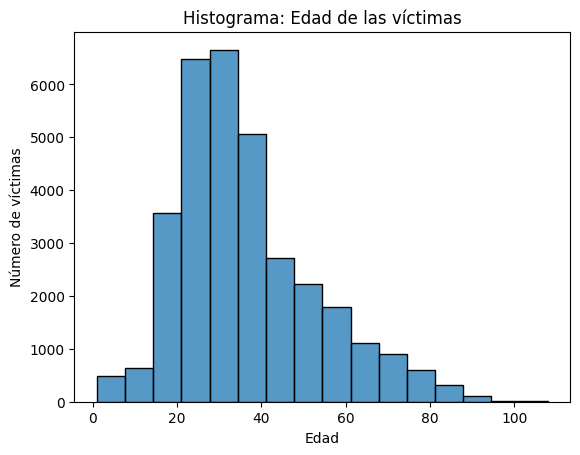

In [ ]:
# Histograma con Seaborn
sns.histplot(
    data = df_siniestros, x='edad', bins='sturges'
    ).set(title='Histograma: Edad de las víctimas', ylabel='Número de víctimas', xlabel='Edad')

Agragando `stat='probability'` podemos calcular la probabilidad

[Text(0.5, 1.0, 'Histograma: Edad de las víctimas'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Edad')]

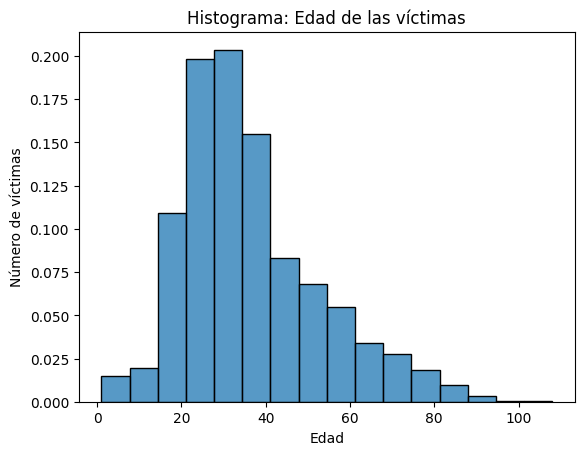

In [ ]:
# Histograma con Seaborn
sns.histplot(
    data = df_siniestros, x='edad', bins='sturges', stat='probability'
    ).set(title='Histograma: Edad de las víctimas', ylabel='Número de víctimas', xlabel='Edad')

Podríamos agregar una variable más al análisis con `hue`, por ejemplo el sexo:



[Text(0.5, 1.0, 'Histograma: Edad de las víctimas por sexo'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Edad')]

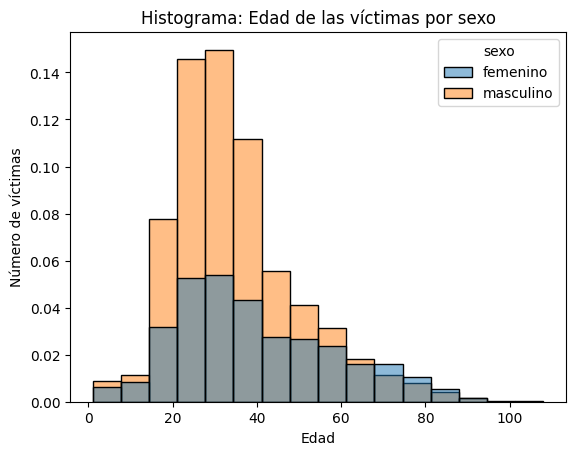

In [ ]:
# Histograma con Seaborn
sns.histplot(
    data=df_siniestros, x='edad', hue='sexo', bins='sturges', stat='probability'
    ).set(title='Histograma: Edad de las víctimas por sexo', ylabel='Número de víctimas', xlabel='Edad')

Si realizamos histogramas con variables categóricas, obtenemos la misma figura que con un **count plot**.

In [ ]:
df_siniestros['causa'].value_counts()

lesiones     32795
homicidio      439
Name: causa, dtype: int64

[Text(0.5, 1.0, 'Histograma: Tipo de siniestro'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Tipo de Siniestro')]

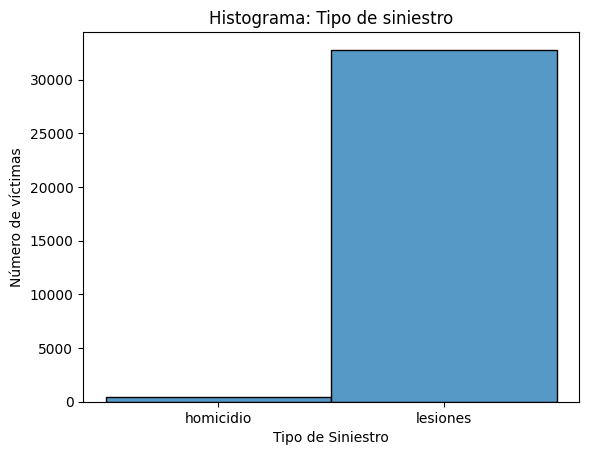

In [ ]:
# Histograma con Seaborn
sns.histplot(
    data = df_siniestros, x='causa'
    ).set(title='Histograma: Tipo de siniestro', ylabel='Número de víctimas', xlabel='Tipo de Siniestro')

[Text(0.5, 1.0, 'Histograma: Tipo de siniestro'),
 Text(0, 0.5, 'Número de víctimas'),
 Text(0.5, 0, 'Tipo de Siniestro')]

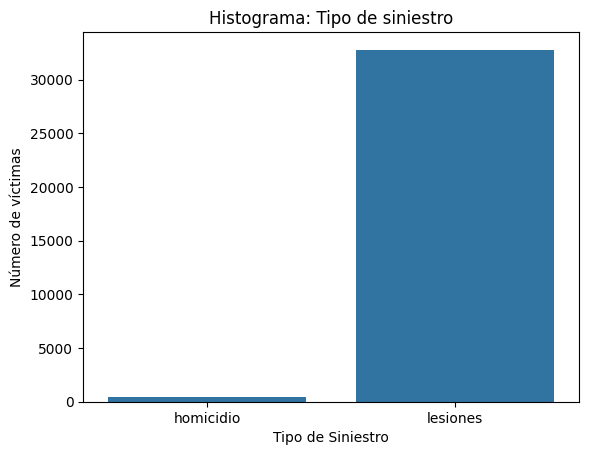

In [ ]:
# Gráfico de barras con Seaborn
sns.countplot(
    data = df_siniestros, x='causa'
    ).set(title='Histograma: Tipo de siniestro', ylabel='Número de víctimas', xlabel='Tipo de Siniestro')

#### Boxplots

Un boxplot muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable categórica. Está constituído por:

  * **La caja**: es un rectángulo que abarca el rango intercuartílico (RIC) de la distribución, es decir, el tramo de la escala que va desde el primer cuartil (C1: 25%) al tercer cuartil (C3=75%), abarcando el 50% de las observaciones centrales.

  * **La Mediana**: Se dibuja mediante una línea dentro de la caja.

  * **Los Bigotes**: Son líneas que salen a los costados de la caja hasta el valor mínimo o máximo, según corresponda.
  
  * **Los valores atípicos o outliers**: punto que se encuentran más allá del mínimo/máximo, por lo que no se lo incluye como parte de la distribución.

  

Seaborn para calcular los outliers, utiliza el método llamado **múltiplo del rango intercuartílico**:

$$ Mínimo = C1 – 1.5 * RIC $$

$$ Máximo = C3 + 1.5 * RIC $$

modificando el parámetro `whis = 1.5` podemos cambiar el valor por default

[Text(0.5, 1.0, 'Bloxplot: Edad'), Text(0.5, 0, 'Edad')]

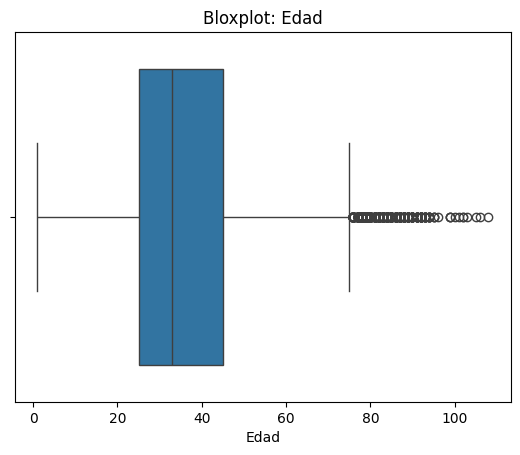

In [ ]:
# Boxplots con Seaborn
sns.boxplot(data=df_siniestros, x='edad').set(title='Bloxplot: Edad', xlabel='Edad')

[Text(0.5, 1.0, 'Bloxplot: Edad'), Text(0.5, 0, 'Edad')]

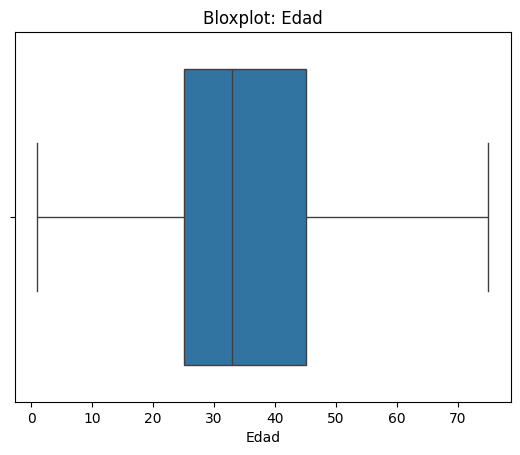

In [ ]:
# Boxplots con Seaborn sin los outliers
sns.boxplot(data=df_siniestros, x='edad', showfliers=False).set(title='Bloxplot: Edad', xlabel='Edad')

[Text(0.5, 1.0, 'Bloxplot: Edad'), Text(0.5, 0, 'Edad')]

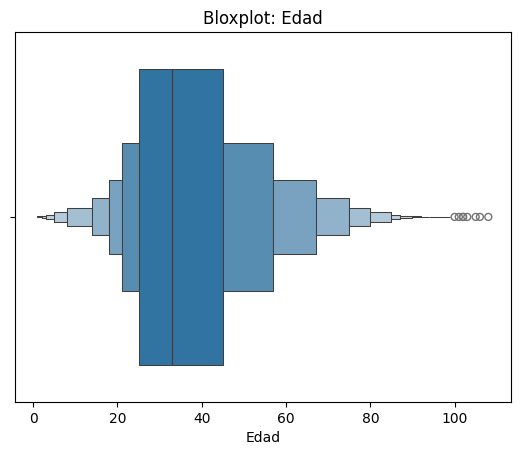

In [ ]:
# Otra opción de boxplot con más cuartiles
sns.boxenplot(data=df_siniestros, x='edad').set(title='Bloxplot: Edad', xlabel='Edad')

Podemos asignar nuevas variables con los parámetros `y` y `hue` como vimos anteriormente.

[Text(0.5, 1.0, 'Bloxplot: Edad por sexo'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Sexo')]

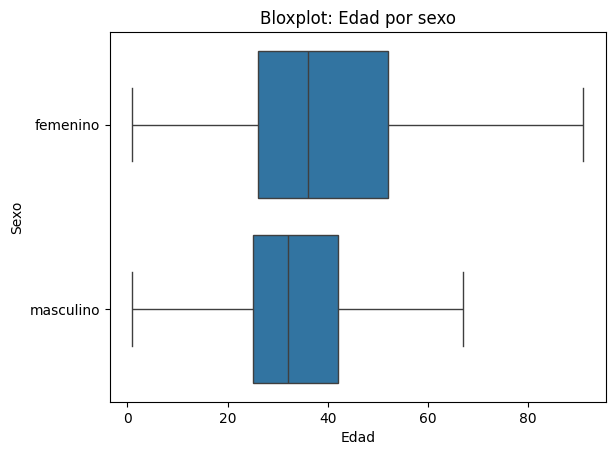

In [ ]:
sns.boxplot(
    data=df_siniestros, x='edad', y='sexo', showfliers=False
    ).set(title='Bloxplot: Edad por sexo', xlabel='Edad', ylabel='Sexo')


Junto al boxplot, podriamos mostrar las observaciones usando `stripplot()`. Dado que contamos con un gran número, un gráfico de **violin** es una mejor opción ya que se escala mejor a mayores volúmenes de datos.

<Axes: title={'center': 'Bloxplot: Edad por sexo'}, xlabel='Edad', ylabel='Sexo'>

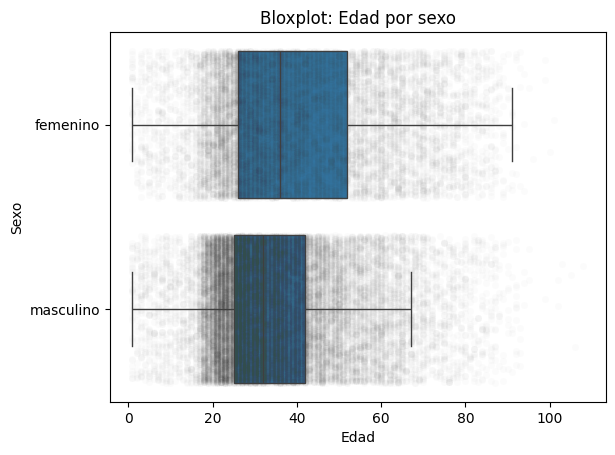

In [ ]:
sns.boxplot(
    data=df_siniestros, x='edad', y='sexo', showfliers=False
    ).set(title='Bloxplot: Edad por sexo', xlabel='Edad', ylabel='Sexo')

# Agregando las observaciones
sns.stripplot(data=df_siniestros, x='edad', y='sexo', alpha=0.02, color=".3", jitter = 0.4)

[Text(0.5, 1.0, 'Bloxplot: Edad por sexo'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Sexo')]

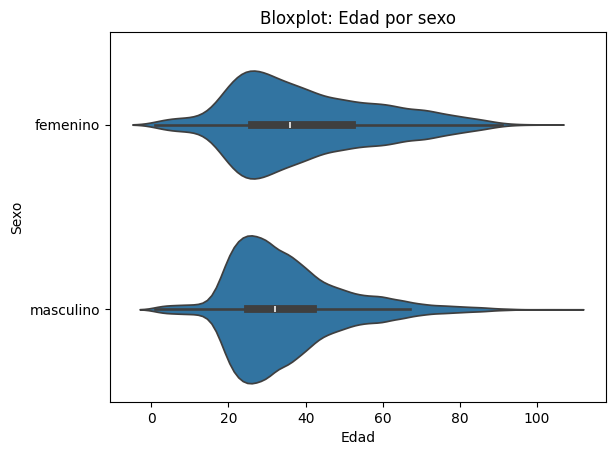

In [ ]:
sns.violinplot(
    data=df_siniestros, x='edad', y='sexo'
    ).set(title='Bloxplot: Edad por sexo', xlabel='Edad', ylabel='Sexo')

#### Correlación

El coeficiente de correlación de Pearson varía en un intervalo [ -1, 1 ] dependiendo si existe una dependencia lineal negativa o positiva, respectivamente.

In [ ]:
# Matriz de correlación
df_siniestros_corr = df_siniestros[[ 'edad', 'mes', 'semestre', 'altura', 'comuna']].corr().round(2)
df_siniestros_corr

,edad,mes,semestre,altura,comuna
edad,1.00,-0.00,-0.00,-0.03,-0.00
mes,-0.00,1.00,0.87,0.01,-0.00
semestre,-0.00,0.87,1.00,0.02,-0.01
altura,-0.03,0.01,0.02,1.00,0.37
comuna,-0.00,-0.00,-0.01,0.37,1.00


Para visualizar la correlación, podemos usar un **heatmap**:

[Text(0.5, 1.0, 'Heatmap')]

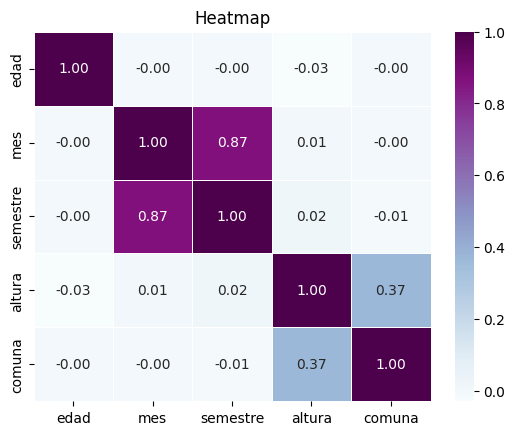

In [ ]:
# Gráfico de calor para la matriz de correlación
sns.heatmap(df_siniestros_corr, cmap='BuPu', fmt='.2f', annot=True, linewidths=.6).set(title='Heatmap')

#### Pair plots y scatter plots

Genera una matriz de gráficos donde la diagonal está compuesta por histogramas y el resto muestra la relación entre pares de variables, con gráficos de puntos.

[Text(0.5, 1.0, 'Scatterplot: Edad y Cantidad de víctimas'),
 Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Cantidad de víctima')]

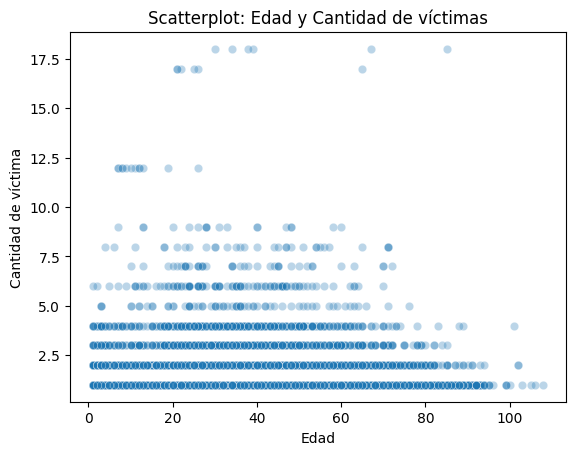

In [ ]:
sns.scatterplot(
    df_siniestros, x='edad', y='cantidad_victimas', alpha= 0.3
    ).set(title='Scatterplot: Edad y Cantidad de víctimas', xlabel='Edad', ylabel='Cantidad de víctima')

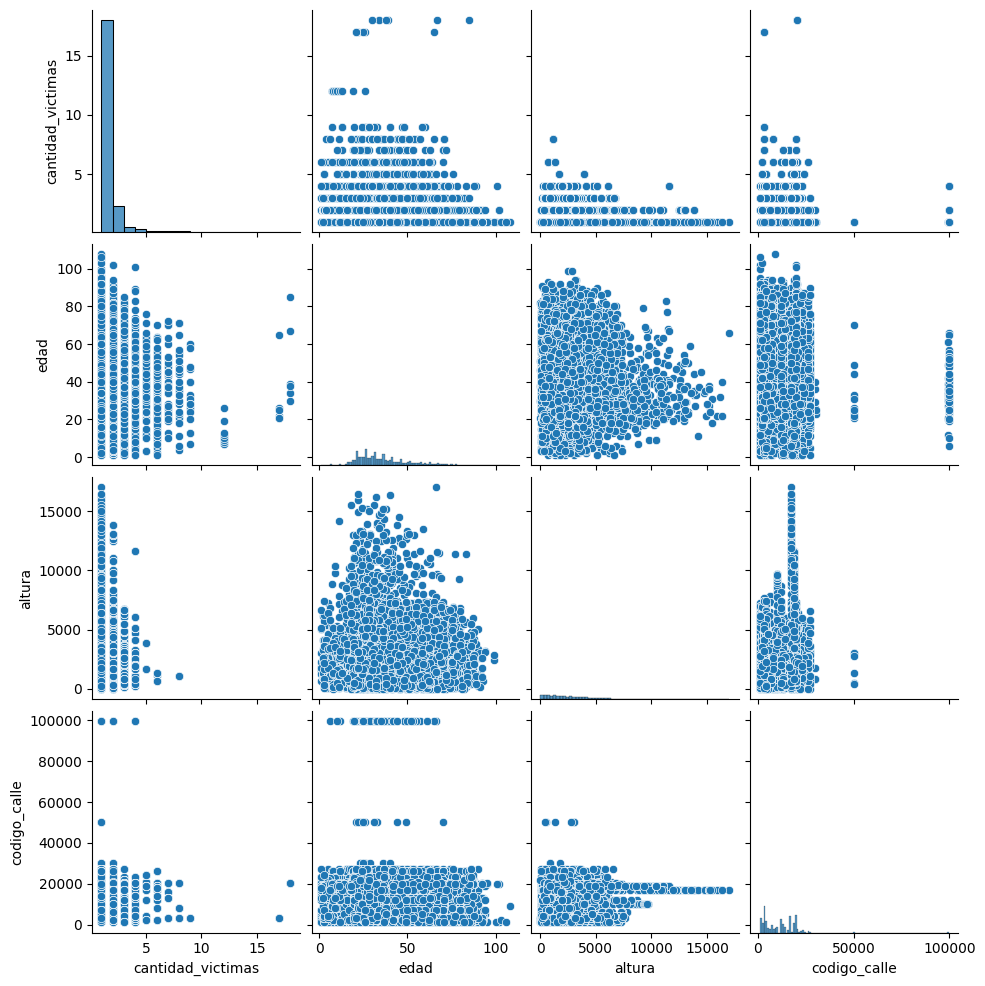

In [ ]:
vars = ['cantidad_victimas', 'edad', 'altura', 'codigo_calle']

sns.pairplot(df_siniestros, x_vars=vars, y_vars=vars)

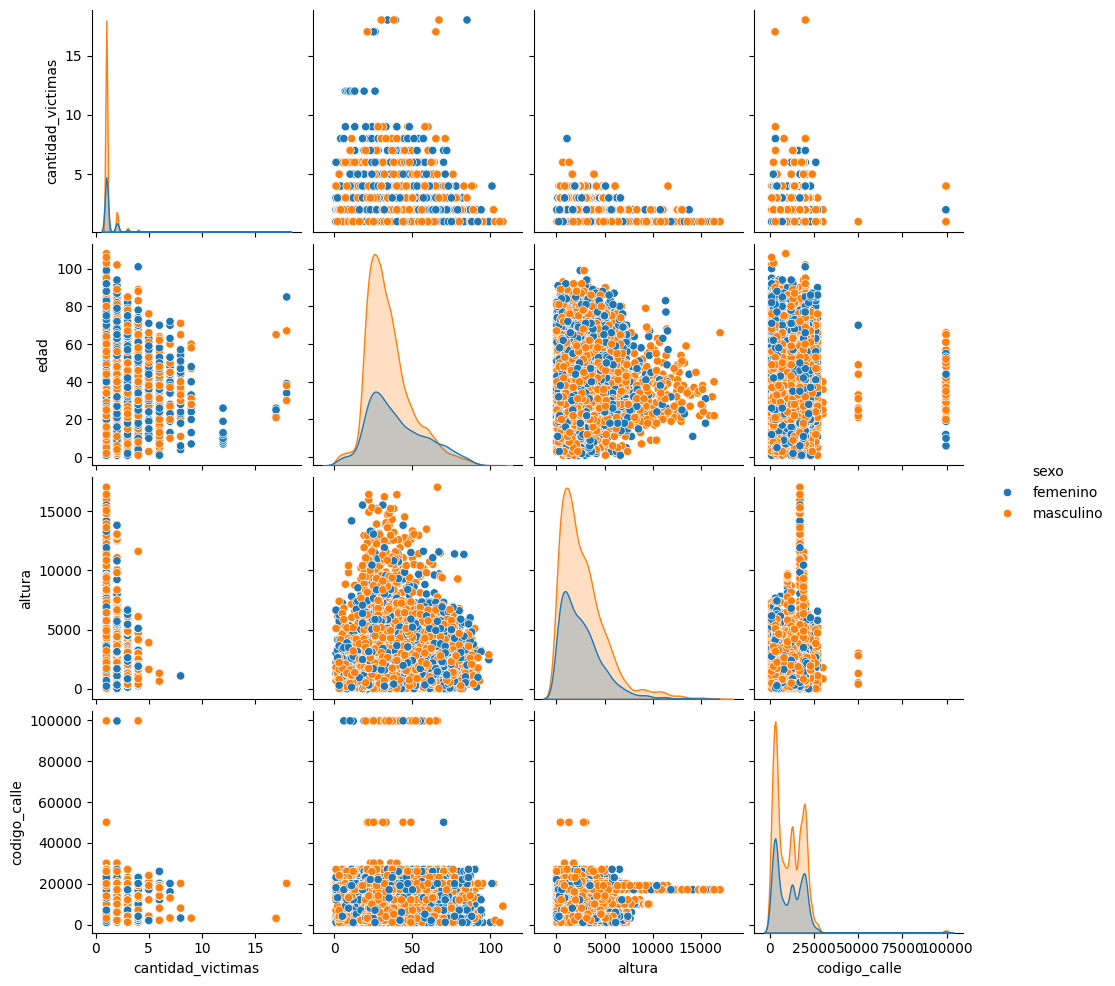

In [ ]:
sns.pairplot(df_siniestros, x_vars=vars, y_vars=vars, hue='sexo')

#### Agrupar con Groupby

`.groupby()` nos permite separar los datos en grupos para facilitar el análisis. Por ejemplo, podemos:

* Agrupar por **sexo**, **rol**, **tipo_calle** a las personas que participaron en los accidentes.

In [ ]:
# Con la función de groupby generamos un nuevo DataFrame
df_causa = df_siniestros.groupby(['tipo_calle', 'rol']).agg('size')
df_causa = pd.DataFrame(df_causa).rename(columns={0:'cantidad'})

# Calculo el porcentaje
df_causa['porcentaje'] = df_causa.groupby(level=0, group_keys=False).apply(lambda x: 100*(x/x.sum())).round(2)
df_causa = df_causa.reset_index()
df_causa

,tipo_calle,rol,cantidad,porcentaje
0,autopista,ciclista,2,1.34
1,autopista,conductor,98,65.77
2,autopista,pasajero,34,22.82
3,autopista,peaton,15,10.07
4,avenida,ciclista,964,4.55
5,avenida,ciclista + peaton,7,0.03
6,avenida,conductor,11543,54.54
7,avenida,conductor + ciclista,8,0.04
8,avenida,conductor + pasajero,7,0.03
9,avenida,conductor + peaton,28,0.13


* Agrupar por **período (año)** y **semestre**:

In [ ]:
df_siniestros.groupby(['periodo', 'semestre']).agg('size')

periodo  semestre
2015     1           4808
         2           5095
2016     1           4961
         2           4919
2017     1           4636
         2           5106
2018     1           3709
dtype: int64

Note que es equivalente a graficar con el conocido **count plot**:

[Text(0.5, 1.0, 'Número de accidentados por año y semestre'),
 Text(0, 0.5, 'Cantidad de víctimas'),
 Text(0.5, 0, 'Año')]

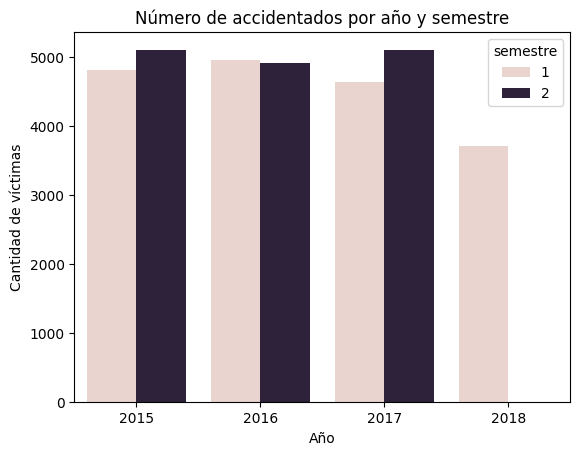

In [ ]:
sns.countplot(
    data=df_siniestros, x='periodo', hue='semestre'
    ).set(title='Número de accidentados por año y semestre', ylabel='Cantidad de víctimas', xlabel='Año')


* Si quisieramos ver una variable más, podemos agregar **columnas de gráficos** de `col`:

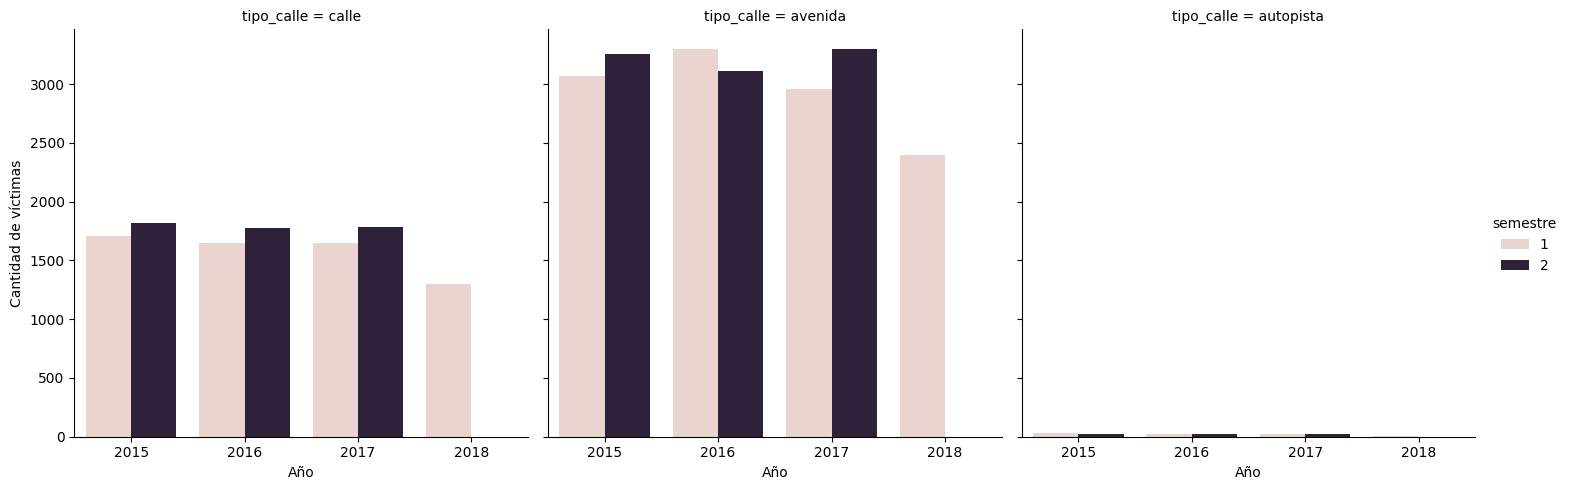

In [ ]:
sns.catplot(
    data=df_siniestros, x='periodo', hue='semestre', col='tipo_calle', kind='count'
    ).set(ylabel='Cantidad de víctimas', xlabel='Año')


* Podemos agrupar por **año** y **mes** pero excluímos a 2018 del análisis porque no cuenta con la data completa.

In [ ]:
df_periodo = df_siniestros.groupby(['periodo', 'mes']).agg('size').reset_index()
df_periodo = pd.DataFrame(df_periodo).rename(columns={0:'cantidad'})
df_periodo = df_periodo[df_periodo['periodo'] != 2018]
df_periodo.head()

,periodo,mes,cantidad
0,2015,1.0,645
1,2015,2.0,738
2,2015,3.0,886
3,2015,4.0,877
4,2015,5.0,900


[Text(0.5, 1.0, 'Número de accidentados a lo largo del año'),
 Text(0, 0.5, 'Cantidad de víctimas'),
 Text(0.5, 0, 'Mes')]

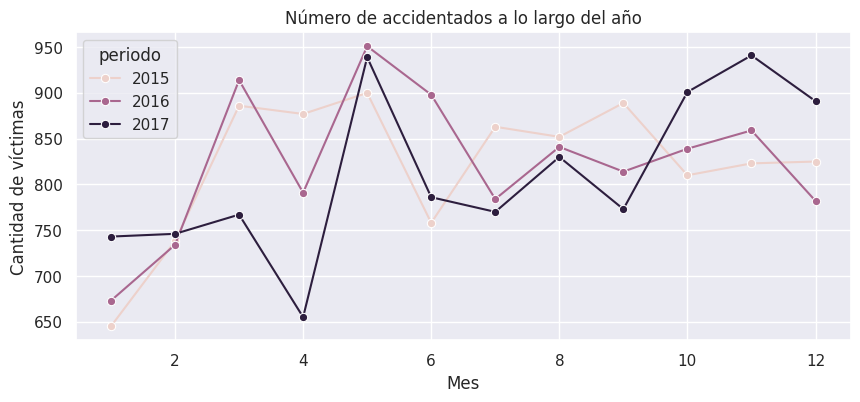

In [ ]:
sns.set(rc={"figure.figsize":(10, 4)}) #width=10, height=4

sns.lineplot(
    data=df_periodo, x='mes', y='cantidad', hue='periodo',  marker='o'
    ).set(title='Número de accidentados a lo largo del año', ylabel='Cantidad de víctimas', xlabel='Mes')

In [ ]:
df_mes = df_periodo.groupby(['mes'])[['cantidad']].agg('sum').reset_index()
df_mes.head()

,mes,cantidad
0,1.0,2061
1,2.0,2218
2,3.0,2567
3,4.0,2323
4,5.0,2790


[Text(0.5, 1.0, 'Número de accidentados por mes'),
 Text(0, 0.5, 'Cantidad de víctimas'),
 Text(0.5, 0, 'Mes')]

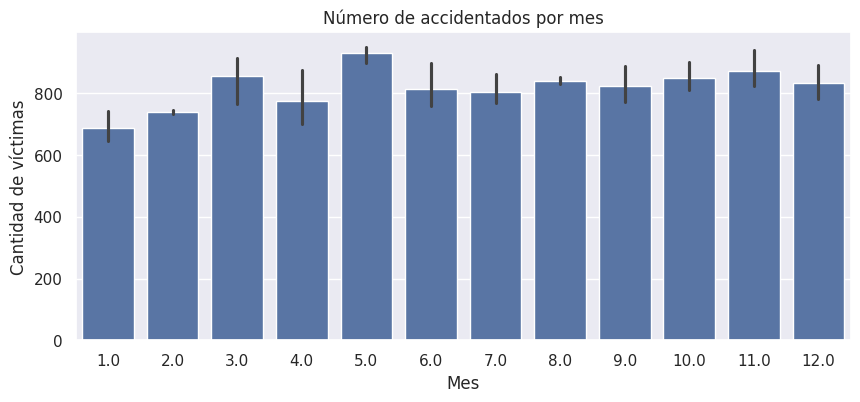

In [ ]:
sns.barplot(
    df_periodo, x='mes', y='cantidad'
    ).set(title='Número de accidentados por mes', ylabel='Cantidad de víctimas', xlabel='Mes')

## Distribución espacial de los siniestros

Vamos a instalar e importar dos nuevas librerías para trabajar con datos geoespaciales.

In [ ]:
!pip install geopandas
!pip install geojson

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import geojson

Para usar Geopandas, primero se define un sistema de referencia de coordenadas (CRS).

In [ ]:
# Iniciamos CRS
crs = {'init':'epsg:4326'}

Para mejorar la visualización, vamos a identificar unicamente la ubicación de los accidentados para el **mes de enero de 2018**:

In [ ]:
# Creamos un nuevo DataFrame fitrando df_siniestros
df_siniestros_2018_1 = 	df_siniestros[(df_siniestros['periodo'] == 2018) & (df_siniestros['mes'] == 1)]

In [ ]:
# Definimos la geometría según nuestro dataset
geometry = [Point(xy) for xy in zip(df_siniestros_2018_1["x"], df_siniestros_2018_1["y"])]

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

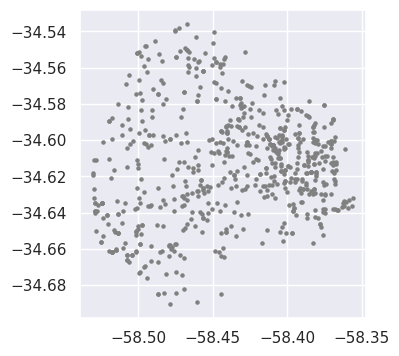

In [ ]:
# Cargamos los datos y graficamos
geodata = gpd.GeoDataFrame(df_siniestros_2018_1, crs=crs, geometry=geometry)

geodata.plot(color='grey', markersize=5)

Una vez que el mapa de geometría está listo, se debe cargar el archivo de las comunas del la ciudad de Buenos Aires que se extrajo de https://data.buenosaires.gob.ar/dataset/comunas/resource/Juqdkmgo-612222-resource : cargamos la carpeta y el archivo Shapefile (SHP)

In [ ]:
# Abrimos un archivo local, es decir, que ha sido descargado en su computadora
from google.colab import files
uploaded = files.upload()

Saving comunas.zip to comunas.zip


In [ ]:
#Extraer el archivo
shapefile = gpd.read_file(io.BytesIO(uploaded['comunas.zip']))

Text(149.36278831695049, 0.5, 'Latitud')

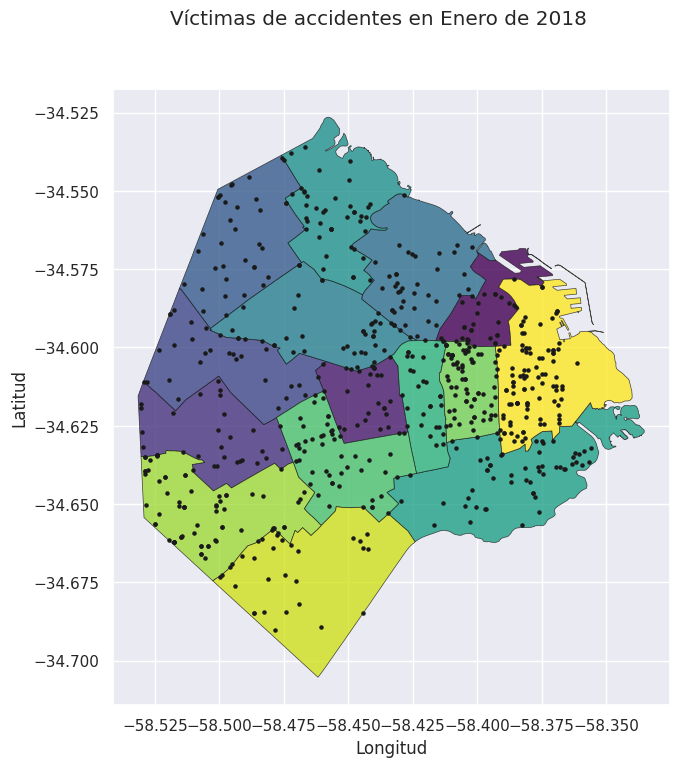

In [ ]:
# Utilizando matplotlib, se representan los puntos sobre el mapa de la ciudad
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))

# Datos
shapefile.plot(ax=ax, edgecolor='k', linewidth=0.5, cmap="viridis", alpha=0.8)
geodata.plot(ax=ax, color='k', markersize=5);

# Titulos
fig.suptitle('Víctimas de accidentes en Enero de 2018')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')